# **Error Analysis**

The error analysis section uses the format from the **Grid Search** (and ``Tuner`` class), i.e. results should be saved as a json like:

* results.json
    * "performance": dict
        * "time": int
        * "eval": dict
        * "train": dict
            * "accuracy": list
            * "precision": list
            * other scores...
    * state_dict: list(list)
    * model: dict
    * hyper: dict
    * criterion: dict
    * optimizer: dict

# **0. Set Up**

Before diving in the models, let's reload the notebook to keep it updated.

In [1]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.style.use('seaborn-darkgrid')

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Then, let's load the dependencies:

In [2]:
# PyTorch
import torch

# Data science
import spacy
import numpy as np
import time
import random

# Load the results

In [16]:
import json

PATH = 'saves/gridsearch/search_34/'

with open(PATH + 'results.json') as f:
    data = json.load(f)
    

with open(PATH + 'log.txt') as f:
    txt = f.read()

In [17]:
print(txt)

Search nÂ°34: BiGRU
Configuration(
  (hyper): Variables(batch_size=64, epochs=100, lr=0.02, vectors_name=model.txt, vectors_url=http://vectors.nlpl.eu/repository/20/58.zip, use_pretrained_embeddings=True)
  (model): Parameters(input_dim=23574, embedding_dim=100, hidden_dim=250, output_dim=6, n_layers=3, bidirectional=True, dropout=0.1, pad_idx_text=1, unk_idx_text=0, pad_idx_label=0)
  (criterion): CrossEntropyLoss(ignore_index=0)
  (optimizer): Adam()
 )
Performances(
  (results train): Scores(loss: 0.0013, accuracy: 0.9994, score: 0.9733, precision: 0.8266, recall: 0.8313, f1_score: 0.8289)
  (results eval): Scores(loss: 0.6593, accuracy: 0.9188, score: 0.7916, precision: 0.3058, recall: 0.3310, f1_score: 0.3152)
)


In [18]:
hyper_parameters = data["hyper"]
model_parameters = data["model"]

print("Hyper Parameters:")
print('\n'.join(str(hyper_parameters).split(', ')))

print("\nModel Parameters:")
print('\n'.join(str(model_parameters).split(', ')))

Hyper Parameters:
{'batch_size': 64
'epochs': 100
'lr': 0.02
'vectors_name': 'model.txt'
'vectors_url': 'http://vectors.nlpl.eu/repository/20/58.zip'
'use_pretrained_embeddings': True}

Model Parameters:
{'model': None
'input_dim': 23574
'embedding_dim': 100
'hidden_dim': 250
'output_dim': 6
'n_layers': 3
'bidirectional': True
'dropout': 0.1
'pad_idx_text': 1
'unk_idx_text': 0
'pad_idx_label': 0
'embeddings': None}


# Load results from a saved model

In [14]:
model = torch.load(PATH + 'model_BiLSTM17_best_epoch25.pt')

data = {'performance': model.performance}

# Simple plots

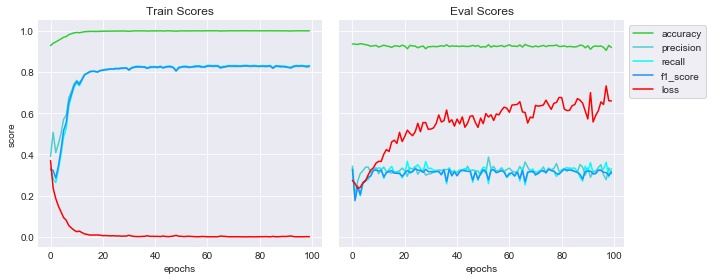

In [19]:
fig = plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
plt.title("Train Scores")
plt.plot(np.array(data['performance']['train']['accuracy']), label="accuracy", color="limegreen")
plt.plot(np.array(data['performance']['train']['precision']), label="precision", color="mediumturquoise")
plt.plot(np.array(data['performance']['train']['recall']), label="recall", color="aqua")
plt.plot(np.array(data['performance']['train']['f1_score']), label="f1_score", color="dodgerblue")
plt.plot(np.array(data['performance']['train']['loss']), label="loss", color="red")

plt.ylim(-0.05, 1.05)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.ylabel('score')
plt.xlabel('epochs')

plt.subplot(1, 2, 2)
plt.title("Eval Scores")
# plt.plot(np.where(np.array(data['performance']['eval']['accuracy']) + 0.05 > 1, 1, np.array(data['performance']['eval']['accuracy']) + 0.05), label="accuracy", color="limegreen")
plt.plot(np.array(data['performance']['eval']['accuracy']), label="accuracy", color="limegreen")
plt.plot(np.array(data['performance']['eval']['precision']), label="precision", color="mediumturquoise")
plt.plot(np.array(data['performance']['eval']['recall']), label="recall", color="aqua")
plt.plot(np.array(data['performance']['eval']['f1_score']), label="f1_score", color="dodgerblue")
plt.plot(np.array(data['performance']['eval']['loss']), label="loss", color="red")
plt.legend(frameon=True, bbox_to_anchor=[1, 1])

plt.ylim(-0.05, 1.05)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], " ")
plt.xlabel('epochs')


# Better plots
plt.tight_layout()

plt.savefig('img/scores_BERT.png', dpi=200)

In [21]:
np.max(data['performance']['eval']['f1_score']), data['performance']['eval']['f1_score'][-1]

(0.3307392814562284, 0.3152347557224751)

# Grid Search Plots

In [30]:
all_data = []
names = []


for i in range(1, 18):
    PATH = f'saves2/gridsearch/search_{i}/results.json'
    with open(PATH) as f:
        data_results = json.load(f)
                
    all_data.append(data_results)

In [31]:
[np.max(all_data[17]['performance']['eval']['f1_score'])]

IndexError: list index out of range

In [ ]:
np.argmax([np.max(all_data[i]['performance']['eval']['f1_score']) for i in range(len(all_data))])

In [32]:
import pandas as pd

imax = np.array([np.argmax(data['performance']['eval']['accuracy']) for data in all_data])
F1_score = np.array([data['performance']['eval']['f1_score'][imax[i]] for i, data in enumerate(all_data)])

Loss = np.array([data['performance']['eval']['loss'][imax[i]] for i, data in enumerate(all_data)])
Acc = np.array([data['performance']['eval']['accuracy'][imax[i]] for i, data in enumerate(all_data)])
Rec = np.array([data['performance']['eval']['recall'][imax[i]] for i, data in enumerate(all_data)])


Hidden_Dim = np.array([data['model']['hidden_dim']for data in all_data])
LR = np.array([data['hyper']['lr']for data in all_data]) # + (np.random.rand(53) * 2 - 1)/100

d = {
    'f1_score': F1_score,
    'loss': Loss,
    'hidden_dim': Hidden_Dim,
    'lr': LR,
    'accuracy': Acc,
    'recall': Rec
}

df = pd.DataFrame(d)

In [28]:
F1_score[28]

0.3500527067135452

In [33]:
import plotly.express as px
fig = px.scatter_3d(df, x='lr', y='loss', z='accuracy',
                    size = 'hidden_dim',
                    color = 'f1_score')
fig.show()

With this example, the training is over fitting the model and evaluation results are diverging.

# Confusion

All confusion matrices are saved in ``data['performance']['train']['confusion']`` (so there are ``EPOCHS`` matrices... for each models !)

It's a lot of data, but the more the better.

Now we can play with all of these, and see the evolution over time etc.

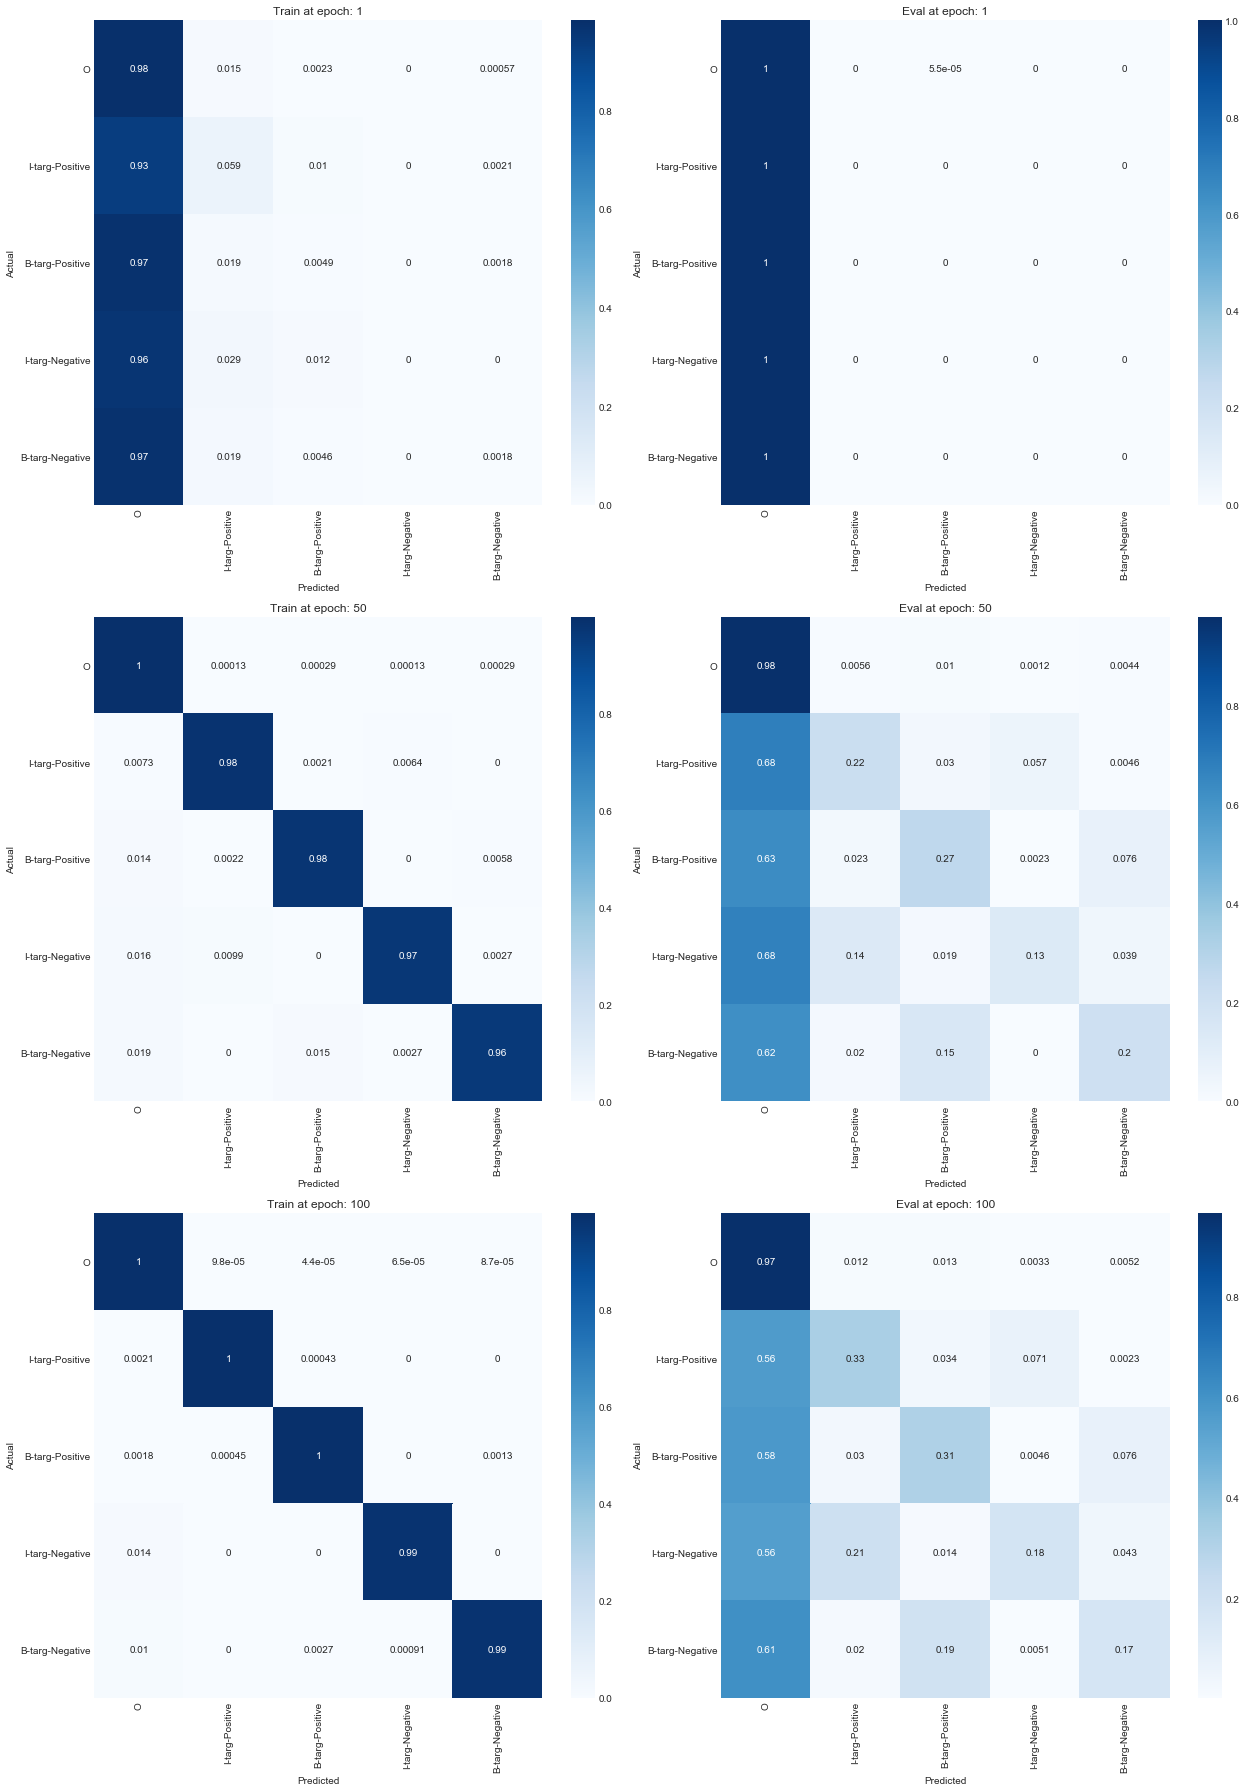

In [8]:
from sentarget.metrics import ConfusionMatrix

fig = plt.figure(figsize=(18, 25))


LABELS = ['<pad>', 'O', 'I-targ-Positive', 'B-targ-Positive', 'I-targ-Negative', 'B-targ-Negative']
NAMES = LABELS[1:]

# Modify this line
EPOCHS = [1, 50, 100]

num_rows = len(EPOCHS)
for i, epoch in enumerate(EPOCHS):
    plt.subplot(num_rows, 2, 2*i + 1)
    mat = data['performance']['train']['confusion'][epoch-1]
    confusion = ConfusionMatrix(data=mat)
    ax = confusion.plot(names=NAMES, normalize=True, cbar=True)
    plt.title(f"Train at epoch: {epoch}")

    plt.subplot(num_rows, 2, 2*i + 2)
    mat = data['performance']['eval']['confusion'][epoch-1]
    confusion = ConfusionMatrix(data=mat)
    ax = confusion.plot(names=NAMES, normalize=True, cbar=True)
    plt.title(f"Eval at epoch: {epoch}")


plt.tight_layout()
plt.show()

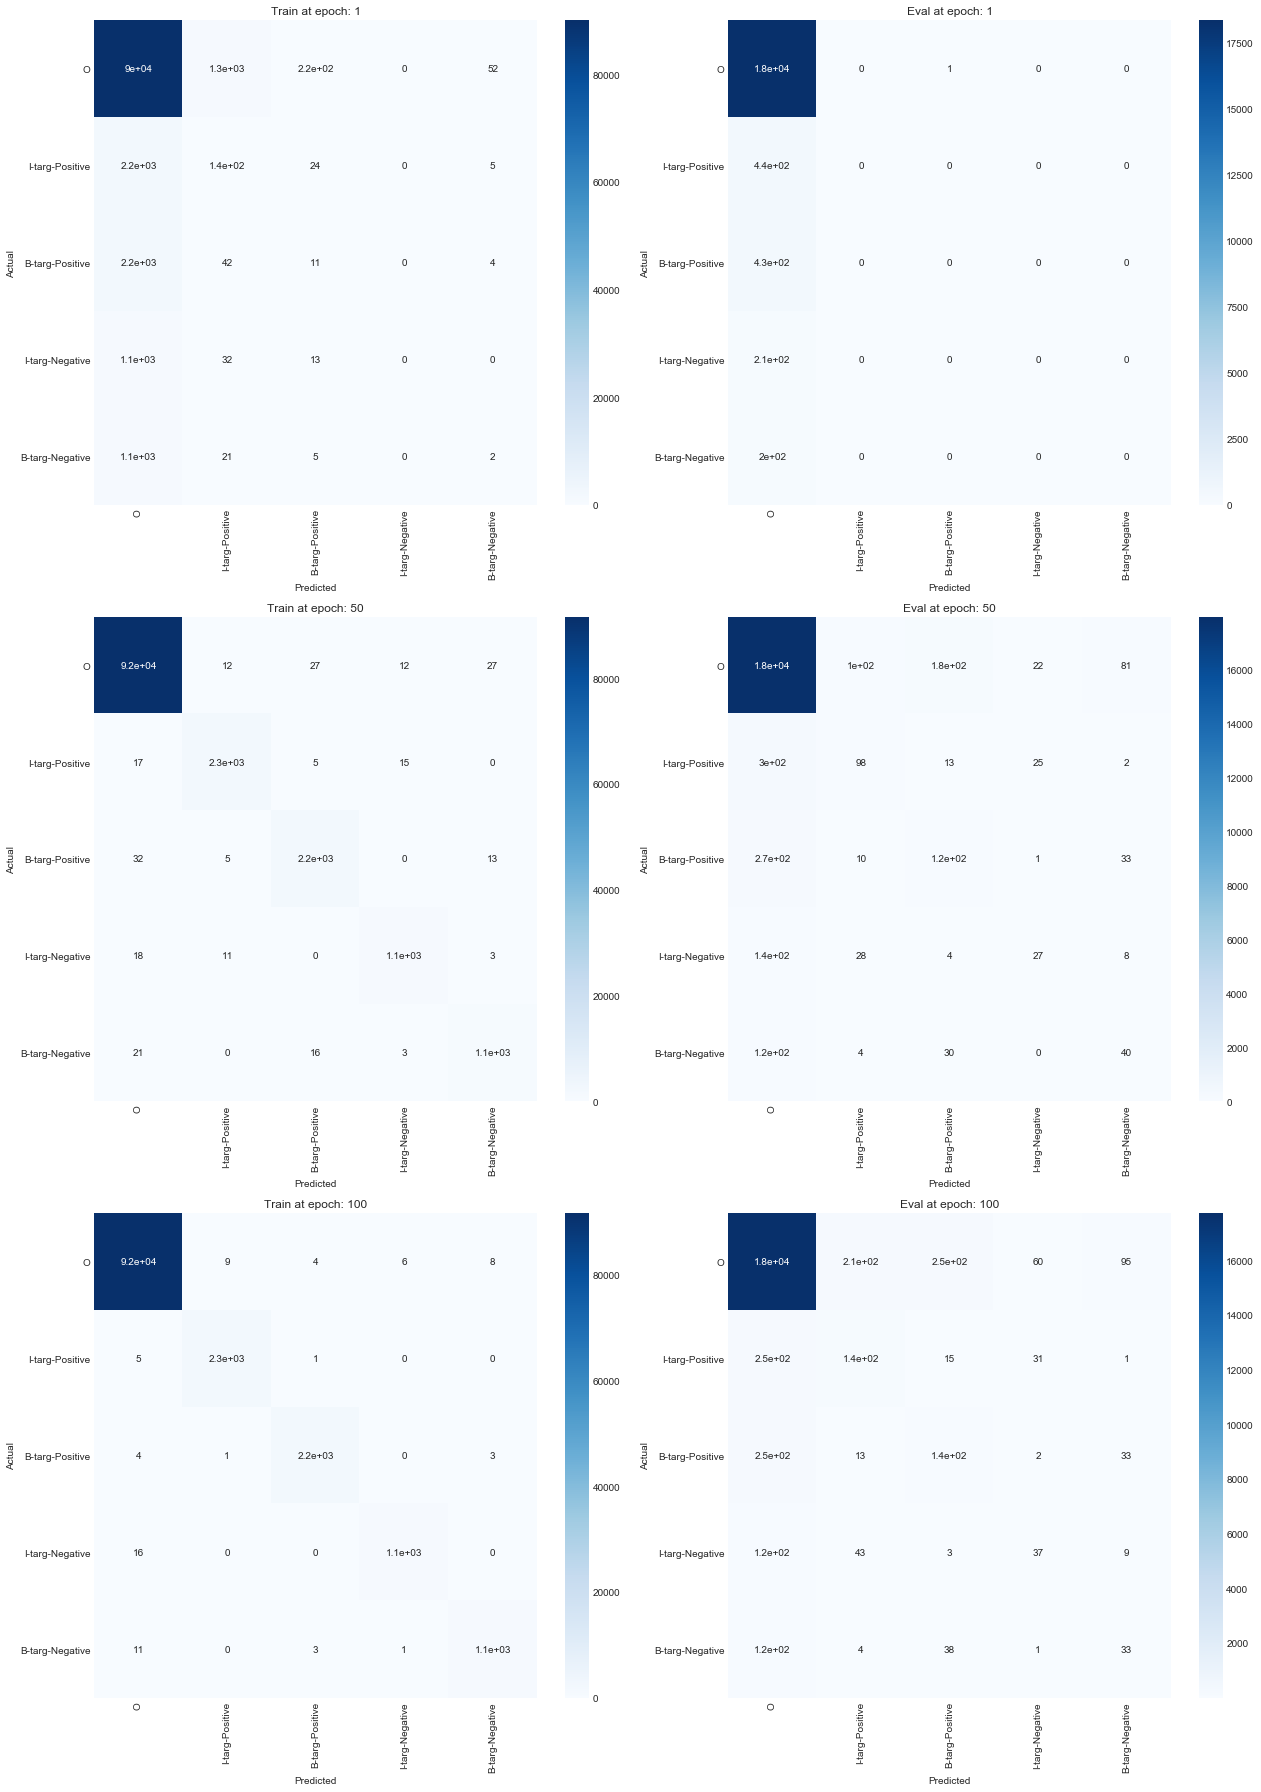

In [9]:
from sentarget.metrics import ConfusionMatrix

fig = plt.figure(figsize=(18, 25))


LABELS = ['<pad>', 'O', 'I-targ-Positive', 'B-targ-Positive', 'I-targ-Negative', 'B-targ-Negative']
NAMES = LABELS[1:]

# Modify this line
EPOCHS = [1, 50, 100]

num_rows = len(EPOCHS)
for i, epoch in enumerate(EPOCHS):
    plt.subplot(num_rows, 2, 2*i + 1)
    mat = data['performance']['train']['confusion'][epoch-1]
    confusion = ConfusionMatrix(data=mat)
    ax = confusion.plot(names=NAMES, normalize=False, cbar=True)
    plt.title(f"Train at epoch: {epoch}")

    plt.subplot(num_rows, 2, 2*i + 2)
    mat = data['performance']['eval']['confusion'][epoch-1]
    confusion = ConfusionMatrix(data=mat)
    ax = confusion.plot(names=NAMES, normalize=False, cbar=True)
    plt.title(f"Eval at epoch: {epoch}")


plt.tight_layout()
plt.show()

# Saving figures

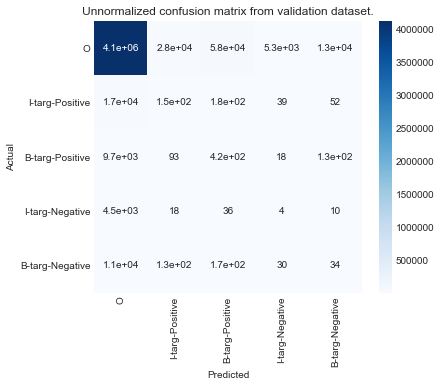

In [139]:
fig = plt.figure(figsize=(6, 5))
# mat = data['performance']['eval']['confusion'][99]
mat = [[4118980.0, 28261.0, 58199.0, 5309.0, 13421.0],
       [16842.0, 151.0, 181.0, 39.0, 52.0],
       [9699.0, 93.0, 422.0, 18.0, 127.0],
       [4536.0, 18.0, 36.0, 4.0, 10.0],
       [11147.0, 133.0, 166.0, 30.0, 34.0]]
confusion = ConfusionMatrix(data=mat)
ax = confusion.plot(names=NAMES, normalize=False, cbar=True)
plt.title(f"Unnormalized confusion matrix from validation dataset.")

plt.savefig(f'img/confusion_imbalance_unnormalized_eval_BERT.png', dpi=200, bbox_inches='tight')

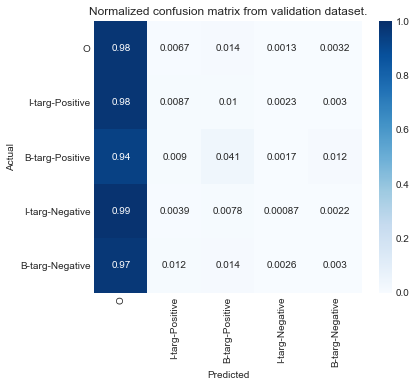

In [141]:
fig = plt.figure(figsize=(6, 5))
# mat = data['performance']['eval']['confusion'][99]
mat = [[4118980.0, 28261.0, 58199.0, 5309.0, 13421.0],
       [16842.0, 151.0, 181.0, 39.0, 52.0],
       [9699.0, 93.0, 422.0, 18.0, 127.0],
       [4536.0, 18.0, 36.0, 4.0, 10.0],
       [11147.0, 133.0, 166.0, 30.0, 34.0]]
confusion = ConfusionMatrix(data=mat)
ax = confusion.plot(names=NAMES, normalize=True, cbar=True, vmin=0, vmax=1)
plt.title(f"Normalized confusion matrix from validation dataset.")

plt.savefig(f'img/confusion_imbalance_normalized_eval_BERT.png', dpi=200, bbox_inches='tight')

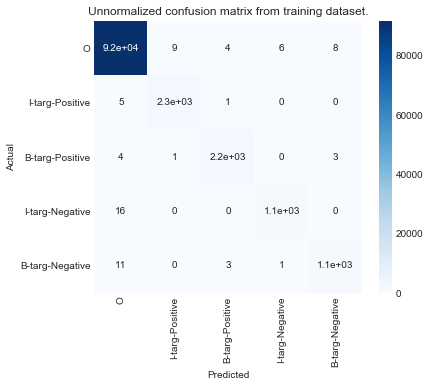

In [12]:
fig = plt.figure(figsize=(6, 5))
mat = data['performance']['train']['confusion'][99]
confusion = ConfusionMatrix(data=mat)
ax = confusion.plot(names=NAMES, normalize=False, cbar=True)
plt.title(f"Unnormalized confusion matrix from training dataset.")

plt.savefig(f'img/confusion_imbalance_unnormalized_train.png', dpi=200, bbox_inches='tight')

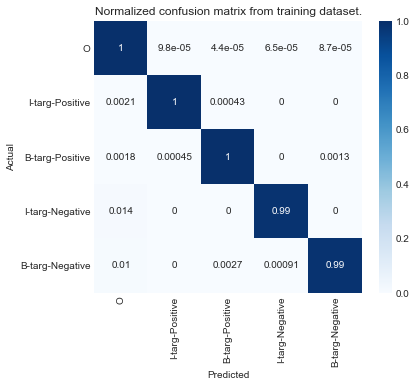

In [13]:
fig = plt.figure(figsize=(6, 5))
mat = data['performance']['train']['confusion'][99]
confusion = ConfusionMatrix(data=mat)
ax = confusion.plot(names=NAMES, normalize=True, cbar=True, vmin=0, vmax=1)
plt.title(f"Normalized confusion matrix from training dataset.")

plt.savefig(f'img/confusion_imbalance_normalized_train.png', dpi=200, bbox_inches='tight')